USFWS EDA Plot Group 6 Biol Counts

**Supports:**

dates=['2014-07-14 00:00:00','2014-07-15 00:00:00','2014-09-29 00:00:00','2015-04-28 00:00:00','2015-08-04 00:00:00','2015-10-20 00:00:00','2016-02-17 00:00:00','2016-05-10 00:00:00','2016-08-09 00:00:00','2016-10-13 00:00:00']

surveys=[201407,201407,201409,201504,201508,201510,201602,201605,201608,201610]



In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime

%matplotlib inline

In [84]:
fpath='/Users/paulp/GoogleDrive/projects/USFWS_PeaIslandNWR/data/'
fn='USFWS_BioCounts.csv'

hdr=["key","BIO_UID","sheet_code","sample_date","transect_id","group","sample_number","ghost_crabs",
"small_mole_crabs","med_mole_crabs","large_mole_crabs","coquina","amphipods","worms"]

df = pd.read_csv(fpath+fn, header=0, names=hdr)

# convert the ISO 8601 datetime field to Python datetime object and then to integers as in the surveys list
# in the Supports section of this notebook. These converted dates are then used to populate a newly created 
# survey field in df (use a lambda func to pull it off):
datetime2survey = lambda i: datetime.datetime.strptime(i,"%Y-%m-%d %H:%M:%S").strftime('%Y%m')
df['survey'] = df['sample_date'].apply( datetime2survey )

# replace all NaNs in the df with 0s:
df1=df.fillna(0)

#df1=df.groupby(['survey','group'], sort=False, as_index=False)[['ghost_crabs', 'coquina']].median()
df1

,key,BIO_UID,sheet_code,sample_date,transect_id,group,sample_number,ghost_crabs,small_mole_crabs,med_mole_crabs,large_mole_crabs,coquina,amphipods,worms,survey
0,17,oct2015_C1_B 2,oct2015_C1,2015-10-20 00:00:00,C1,control,2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,201510
1,18,oct2015_C1_B 3,oct2015_C1,2015-10-20 00:00:00,C1,control,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,201510
2,20,oct2015_C2_B 1,oct2015_C2,2015-10-20 00:00:00,C2,control,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,201510
3,21,oct2015_C2_B 2,oct2015_C2,2015-10-20 00:00:00,C2,control,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,201510
4,22,oct2015_C2_B 3,oct2015_C2,2015-10-20 00:00:00,C2,control,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,201510
5,23,oct2015_C3_B 1,oct2015_C3,2015-10-20 00:00:00,C3,control,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,201510
6,24,oct2015_C3_B 2,oct2015_C3,2015-10-20 00:00:00,C3,control,2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,201510
7,25,oct2015_C3_B 3,oct2015_C3,2015-10-20 00:00:00,C3,control,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,201510
8,27,oct2015_C4_B 1,oct2015_C4,2015-10-20 00:00:00,C4,control,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,201510
9,29,oct2015_C4_B 2,oct2015_C4,2015-10-20 00:00:00,C4,control,2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,201510


In [88]:
#df2=df.query('survey=="201610"')  # & group=="control"')
#df2['small_mole_crabs'].sum()   
#df2['med_mole_crabs'].sum()
#df2['large_mole_crabs'].std()
df1.describe()

,key,sample_number,ghost_crabs,small_mole_crabs,med_mole_crabs,large_mole_crabs,coquina,amphipods,worms
count,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000
mean,387.585196,1.997207,0.593575,4.075419,0.831006,0.120112,0.776536,0.128492,0.022346
std,211.479741,0.819342,1.180690,8.785074,2.093130,0.481359,2.112979,0.499200,0.147911
min,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,206.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,386.500000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,565.250000,3.000000,1.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,754.000000,3.000000,15.000000,106.000000,18.000000,4.000000,16.000000,5.000000,1.000000


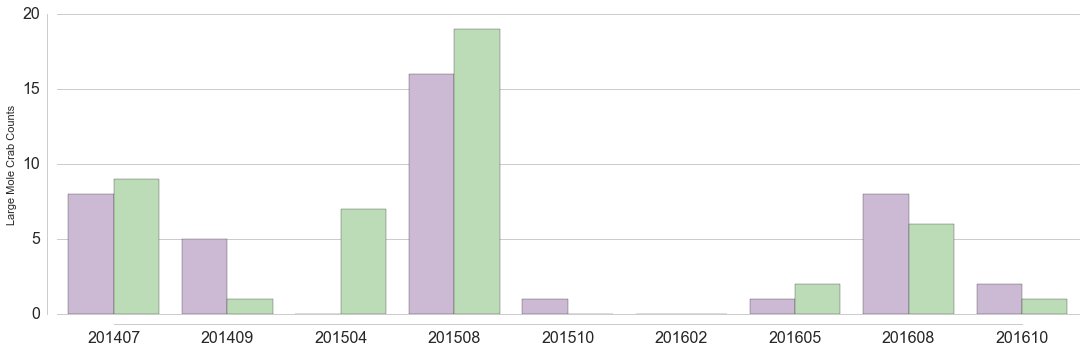

In [80]:
#figpg = plt.figure(figsize=(15,5))
#axspg = figpg.add_subplot(1,1,1)
#figpg.tight_layout(pad=5.1, w_pad=0.5, h_pad=2.0)

#sns.set(style="whitegrid")

### y=["ghost_crabs",
### "small_mole_crabs","med_mole_crabs","large_mole_crabs","coquina","amphipods","worms"]

sns.set_color_codes("pastel")
g = sns.factorplot(x="survey", y="large_mole_crabs", hue="group", data=df,
                    size=5, aspect=3, estimator=sum, kind="bar", ci=None, legend=False, palette="PRGn")
sns.despine(offset=10, trim=True)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
#g.set_xlabel('')
#g.set_ylabel("Lg. Mole Crab Mean Counts", fontsize=16)       ####### ADJUST #######

g.set_axis_labels("", "Large Mole Crab Counts")

plot_path='/Users/paulp/GoogleDrive/projects/USFWS_PeaIslandNWR/plots/pg6/'
plt.savefig(plot_path+'Sample_Lg_Mole_Crab_counts.jpg', dpi=300)

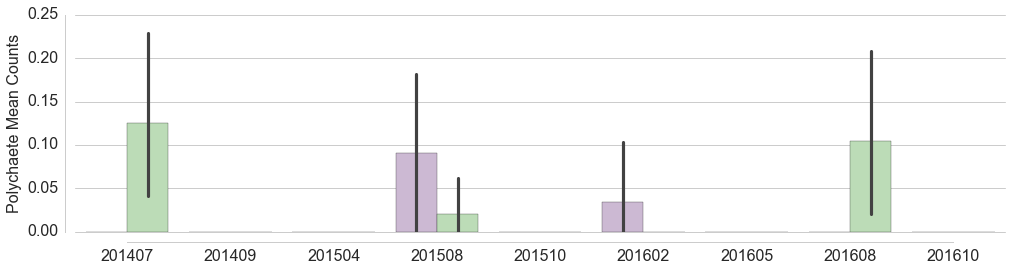

In [98]:
### Bar plot means with 95% CI

figpg = plt.figure(figsize=(15,5))
axspg = figpg.add_subplot(1,1,1)
figpg.tight_layout(pad=5.1, w_pad=0.5, h_pad=2.0)

#sns.set(style="whitegrid")

### y=["ghost_crabs",
### "small_mole_crabs","med_mole_crabs","large_mole_crabs","coquina","amphipods","worms"]

sns.set_color_codes("pastel")
axb = sns.barplot(x="survey", y="worms", hue="group", data=df1, palette="PRGn")       ####### ADJUST #######
sns.despine(offset=10, trim=True)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
axb.set_xlabel('')
axb.set_ylabel("Polychaete Mean Counts", fontsize=16)       ####### ADJUST #######
axb.legend_.remove()

plot_path='/Users/paulp/GoogleDrive/projects/USFWS_PeaIslandNWR/plots/pg6/'
plt.savefig(plot_path+'Sample_Polychaete_means.jpg', dpi=300)       ####### ADJUST #######